# Suplementary Information figures for publication ExoPhot II 
Generation of figures for the second paper of the series dedicated to ExoPhot to be added to the suplementary information document.

### Load libraries 
Load libraries and functions

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
import pandas as pd
import itertools
from os import walk
from pathlib import Path

### Define available cases to plot

In [31]:
theoretical_pigm = ['ChlA_tddft', 'BChlA_tddft', 'Phot0-Zn', 'Phot0-Mg']


### Choose colorblind color scheme

In [32]:
# https://gist.github.com/thriveth/8560036
CB_color_cycle = ['#4daf4a', '#e41a1c', '#984ea3','#dede00', '#999999','#377eb8', '#ff7f00']


### Define plot functions

In [37]:
def plot_pigment_extinction(wl, pigm_extinct, pigm_label, color, ax):
    """Helper function to plot molar extinction coeficient of theoretical pigments
    """
 
    
    ax.plot(wl, pigm_extinct, label=pigm_label, color=color)
    
    #ax.set_ylim(0,None)
    ax.set_xlim(250,800)

    #ax.autoscale(enable=True, axis='x', tight=True)
    ax.set_ylim(0,400000)
    ax.set_ylabel('$\epsilon_{abs}$ (M$^{-1}$ cm$^{-1}$)',fontsize=15)
    ax.set_xlabel('Wavelength ($nm$)',fontsize=15)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-1, 1), useMathText = True, useOffset=False)    
    
    # We change the fontsize of minor ticks label 
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='both', which='minor', labelsize=10)
    
    ax.legend(loc="upper right",fontsize=12)




## Molar extinction coeficient 
The molar extinction coeficient ($\epsilon_{\rm abs}$) of the theoretical pigment is retrieved from the input folder. $\epsilon_{\rm abs}(\lambda)$ is in units of M$^{-1}$ cm$^{-1}$. 
 

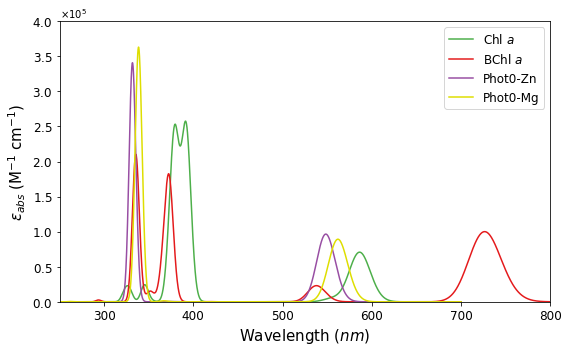

In [38]:


fig, ax = plt.subplots(1,1,figsize=(8,5))

#Set the input folder of the pigments molar extinction files
th_pigm_folder = "../input/theoric_pigments/" 

# pigment label for the plot
pigm_label = ['Chl $\it{a}$', 'BChl $\it{a}$', 'Phot0-Zn', 'Phot0-Mg']

iterator = 0
#Iterate in pigment's names
for pigm_name in theoretical_pigm:
    #2D array with pigment extinction coefficient spectrum [nm; M-1 cm-1]
    pigm_extinct_array = np.loadtxt(th_pigm_folder+pigm_name+'.txt',usecols=(0,1)) # [nm, M-1 cm-1]
    pigm_extinct_array = np.transpose(pigm_extinct_array)
    
    # from nm to Angstrom
    #pigm_extinct_array[0] = 10*pigm_extinct_array[0]

    # Molar Extinction (cm-1/M) given in 1E5 
    #pigm_extinct_array[1] = 10E5*pigm_extinct_array[1]

    plot_pigment_extinction(pigm_extinct_array[0], pigm_extinct_array[1], pigm_label[iterator], CB_color_cycle[iterator], ax)
    iterator = iterator +1

plt.tight_layout()
plt.savefig('../output/figures/pigment_extinction_plot.pdf', dpi = 150)
plt.show()  

## Compare  molar extinction coeficient of Phot0-Zn with its dimero
The molar extinction coeficient ($\epsilon_{\rm abs}$) of the theoretical pigment is retrieved from the input folder. $\epsilon_{\rm abs}(\lambda)$ is in units of M$^{-1}$ cm$^{-1}$. 

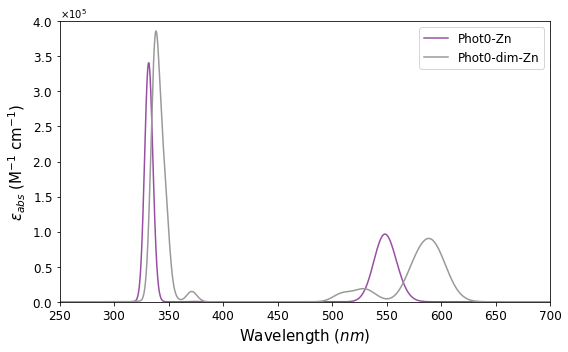

In [30]:
phot0Zn_list = ['Phot0-Zn', 'Phot0-dim-Zn']


fig, ax = plt.subplots(1,1,figsize=(8,5))

#Set the input folder of the pigments molar extinction files
th_pigm_folder = "../input/theoric_pigments/" 

# pigment label for the plot
pigm_label = ['Phot0-Zn', 'Phot0-dim-Zn']

iterator = 0
#Iterate in pigment's names
for pigm_name in phot0Zn_list:
    #2D array with pigment extinction coefficient spectrum [nm; M-1 cm-1]
    pigm_extinct_array = np.loadtxt(th_pigm_folder+pigm_name+'.txt',usecols=(0,1)) # [nm, M-1 cm-1]
    pigm_extinct_array = np.transpose(pigm_extinct_array)
    
    # from nm to Angstrom
    #pigm_extinct_array[0] = 10*pigm_extinct_array[0]

    # Molar Extinction (cm-1/M) given in 1E5 
    #pigm_extinct_array[1] = 10E5*pigm_extinct_array[1]

    plot_pigment_extinction(pigm_extinct_array[0], pigm_extinct_array[1], pigm_label[iterator], CB_color_cycle[2*iterator+2], ax)
    iterator = iterator +1

plt.tight_layout()
plt.savefig('../output/figures/phot0-dimer_plot.pdf', dpi = 150)
plt.show()  